In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

In [2]:
folder = os.path.join('..', 'outputs', 'saved_run_20231124t094949')

In [3]:
reader = emcee.backends.HDFBackend(os.path.join(folder, 'backend.hdf'))

In [4]:
chain = reader.get_chain()
nstep, nwalker, ndim = chain.shape

In [5]:
print(f"(nstep, nwalker, ndim):  {chain.shape}")

(nstep, nwalker, ndim):  (1435, 48, 3)


In [6]:
blobs = reader.get_blobs()

In [7]:
print(blobs['int_time'].shape)

(1435, 48, 1, 3)


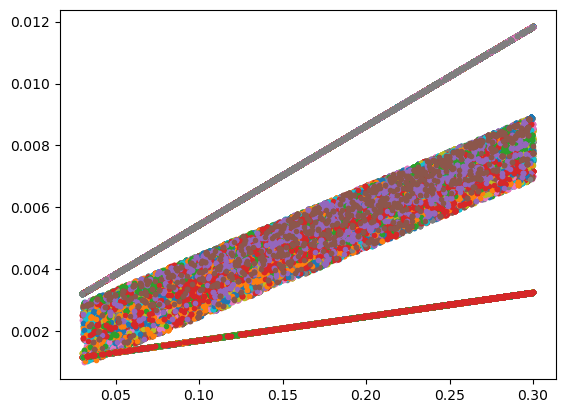

In [8]:
for dim in range(ndim): 
    x = chain[:, :, dim]
    y = blobs['C_p'][:, :, 0, dim]
    plt.plot(x, y, '.')
plt.show()

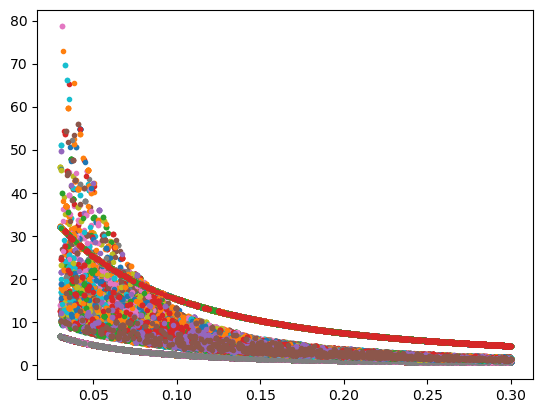

In [9]:
for dim in range(ndim): 
    x = chain[:, :, dim]
    y = blobs['int_time'][:, :, 0, dim]
    plt.plot(x, y, '.')
plt.show()

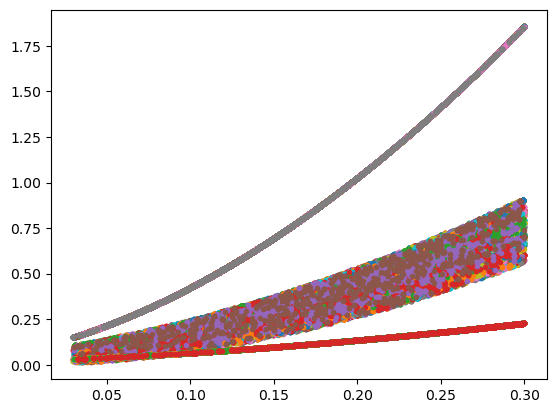

In [10]:
for dim in range(ndim): 
    x = chain[:, :, dim]
    y = 1/(blobs['int_time'][:, :, 0, dim])
    plt.plot(x, y, '.')
plt.show()

In [11]:
tau = reader.get_autocorr_time(tol=1)

In [12]:
acc_rate = reader.accepted/chain.shape[0]

In [13]:
print(acc_rate.mean())

0.5057491289198607


In [14]:
print(tau.mean())
print(np.median(tau))

43.27785394147599
43.53967862164665


In [15]:
print(tau)

[43.53967862 42.13119171 44.1626915 ]


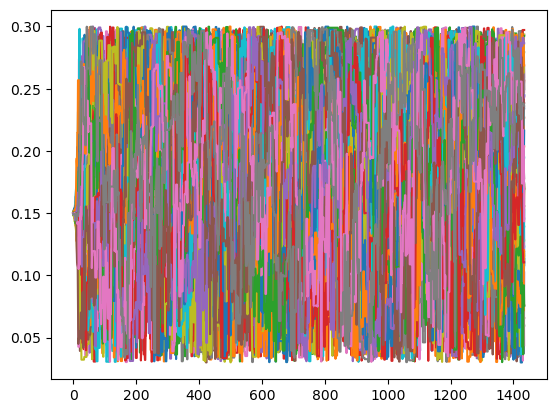

In [16]:
plt.plot(chain[:, :, 1])
plt.show()

In [17]:
flat_chain = reader.get_chain(discard=130, flat=True)
print(flat_chain.shape)

(62640, 3)


In [18]:
# labels = ["idrk", "W11", "W12", "W21", "W22", "W31", "W32", "W41", "W42", "W51", "W52", "W61", "W62"
#           , "C3", "C4", "C5", "T3", "T4", "T5"]
labels = ["T3", "T4", "T5"]

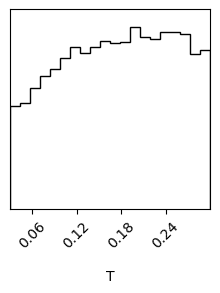

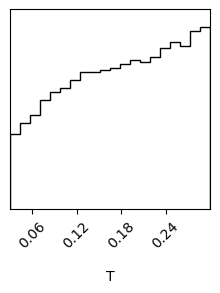

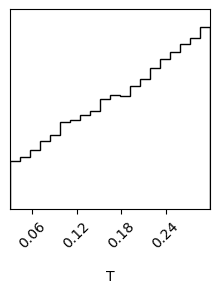

In [19]:
for i in range(flat_chain.shape[1]):
    fig = corner.corner(flat_chain[:, i:i+1], labels=labels[i])
plt.show()

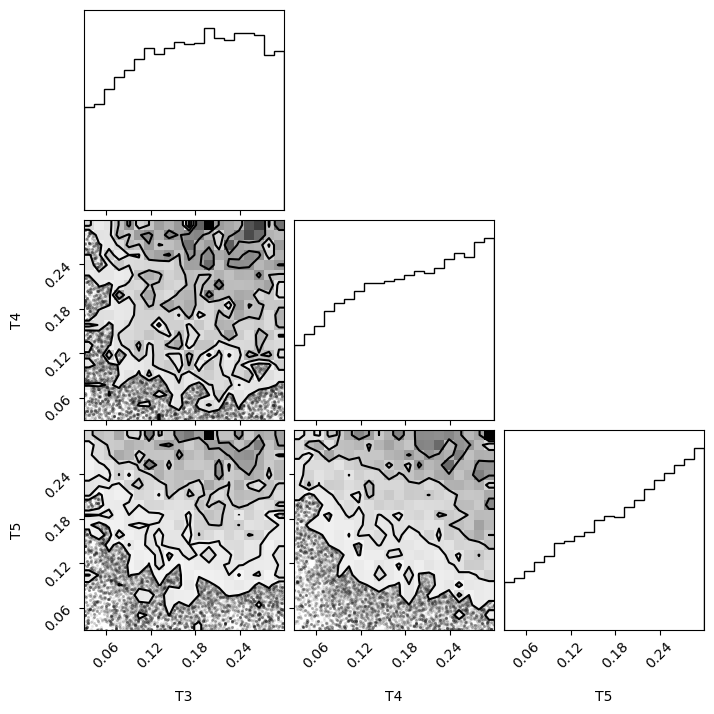

In [20]:
fig = corner.corner(flat_chain, labels=labels)